In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("Running on device:", DEVICE.upper())

Running on device: CUDA


In [2]:
from model import NeuralNetwork
from data_loader import *
from base import GradientFreeOptimization

In [3]:
train_loader = load_mnist_train(samples_per_class=100, seed=42, batch_size=64)
test_loader = load_mnist_test(batch_size=64)

Size of balanced training dataset: 1000
Size of balanced test dataset: 10000


In [12]:
# Step 4: Choose a loss function and optimizer
model = NeuralNetwork().to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [13]:
# Lists to store the training loss and accuracy for visualization
train_loss_history = []
train_accuracy_history = []
train_f1score_history = []

# Step 5: Train the network
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    true_labels = []
    predicted_labels = []

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        _, predicted = torch.max(output.data, 1)
        
        true_labels.extend(target.tolist())
        predicted_labels.extend(predicted.tolist())

    train_loss = running_loss / len(train_loader)
    train_accuracy = accuracy_score(true_labels, predicted_labels)
    train_f1score = f1_score(true_labels, predicted_labels, average='macro')
    
    train_loss_history.append(train_loss)
    train_accuracy_history.append(train_accuracy)
    train_f1score_history.append(train_f1score)

    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy*100:.2f}%, Training F1-score: {train_f1score*100:.2f}%')

Epoch [1/50], Training Loss: 2.1007, Training Accuracy: 30.90%, Training F1-score: 31.65%
Epoch [2/50], Training Loss: 1.4873, Training Accuracy: 63.60%, Training F1-score: 61.77%
Epoch [3/50], Training Loss: 0.9451, Training Accuracy: 76.30%, Training F1-score: 75.96%
Epoch [4/50], Training Loss: 0.6789, Training Accuracy: 80.50%, Training F1-score: 80.44%
Epoch [5/50], Training Loss: 0.5460, Training Accuracy: 83.70%, Training F1-score: 83.66%
Epoch [6/50], Training Loss: 0.4698, Training Accuracy: 86.90%, Training F1-score: 86.87%
Epoch [7/50], Training Loss: 0.4137, Training Accuracy: 88.80%, Training F1-score: 88.82%
Epoch [8/50], Training Loss: 0.3531, Training Accuracy: 89.80%, Training F1-score: 89.80%
Epoch [9/50], Training Loss: 0.3164, Training Accuracy: 90.70%, Training F1-score: 90.69%
Epoch [10/50], Training Loss: 0.2850, Training Accuracy: 91.30%, Training F1-score: 91.32%
Epoch [11/50], Training Loss: 0.2812, Training Accuracy: 91.20%, Training F1-score: 91.20%
Epoch [1

In [14]:
# Save the trained model and metrics
torch.save(model.state_dict(), 'ann_adam_mnist_model.pth')
np.savez('ann_adam_mnist_training_history', train_loss_history=train_loss_history, train_accuracy_history=train_accuracy_history, train_f1score_history=train_f1score_history)

In [15]:
# Load the trained model
model.load_state_dict(torch.load('ann_adam_mnist_model.pth'))

<All keys matched successfully>

In [16]:
# Step 6: Test the network
model.eval()
true_labels = []
predicted_labels = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(DEVICE), target.to(DEVICE)
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        true_labels.extend(target.tolist())
        predicted_labels.extend(predicted.tolist())
        
    test_accuracy = accuracy_score(true_labels, predicted_labels)
    test_f1score = f1_score(true_labels, predicted_labels, average='macro')

print(f'Test Accuracy: {test_accuracy*100:.2f}%, Test F1-score: {test_f1score*100:.2f}%')

Test Accuracy: 87.95%, Test F1-score: 87.80%


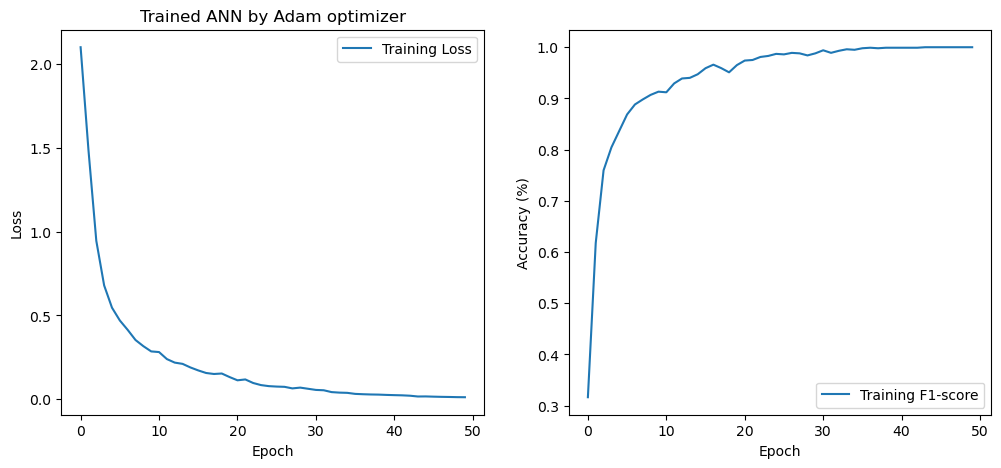

In [17]:
# Plot the training loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Trained ANN by Adam optimizer')
plt.subplot(1, 2, 2)
plt.plot(train_f1score_history, label='Training F1-score')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()